## Reinforcement Learning

### Model-based reinforcement learning

- Leer transitiefunctie $T(s, a, s')$ van de omgeving
- Ontdek reward functie $R(s, a, s')$ wanneer we (state-actie-state) tupels ervaren

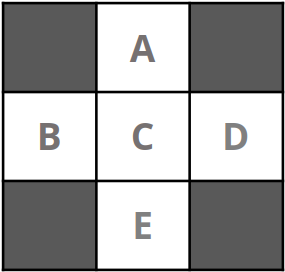

In [15]:
dataset = [
    # episode 1
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 2
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 3
    ['E', 'north','C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 4
    ['E', 'north','C', -1],
    ['C', 'east', 'A', -1],
    ['A', 'exit', 'x', -10],
]

states = ['A', 'B', 'C', 'D', 'E', 'x']
actions = ['east', 'west', 'south', 'north', 'exit']

# 3-dimensionale dictionary (zeer inefficient)
T = {s : {a : {sn : 1e-6 for sn in states} for a in actions} for s in states}
R = {s : {a : {sn : float('-inf') for sn in states} for a in actions} for s in states}

# evaluate each state-action-state triplet 
for s, a, sn, r in dataset:
    R[s][a][sn] = r
    T[s][a][sn] += 1

# normalize transitions to sum to 1 for each (s, a)
for s in states:
    for a in actions:
        summed_rewards = sum(T[s][a].values())
        T[s][a] = {key: val / summed_rewards for key, val in T[s][a].items()}

T['C']['east'], R['C']['east']

({'A': 0.24999987500018747,
  'B': 2.499996250005625e-07,
  'C': 2.499996250005625e-07,
  'D': 0.7499991250013125,
  'E': 2.499996250005625e-07,
  'x': 2.499996250005625e-07},
 {'A': -1, 'B': -inf, 'C': -inf, 'D': -1, 'E': -inf, 'x': -inf})

### Model-free reinforcement learning

- Leer een directe representatie van waarde van states/actions
- **Temporal difference learning**:
  - Leer de waarderingsfunctie $V(s)$ (in het boek $U(s)$): hoe goed is het voor de agent om in state $s$ te zijn?
  - Leer de kwaliteitsfunctie $Q(s, a)$: hoe goed is het voor de agent om in state $s$ actie $a$ uit te voeren?

#### Waarderingsfunctie $V(s)$

- *Temporal difference* omdat we kijken naar het verschil tussen 
  - de huidige waarde van een state, $V(s)$ 
  - en de discounted waarde van de volgende state plus reward, $\gamma V(s') + R(s, a, s')$
  - waarbij $\gamma$ de discount factor voorstelt
- Update de huidige waarde $V(s)$ met dit (temporaal) verschil gewogen door een learning rate $\alpha$
- Dus $V(s) \leftarrow V(s) + \alpha [\gamma V(s') + R(s, a, s') - V(s)]$ 
- Dit kunnen we ook opschrijven als:
$$
    V(s) \leftarrow \underbrace{(1-\alpha)V(s)}_{\text{aandeel oud}} + \underbrace{\alpha (R(s, a, s') + \gamma V(s'))}_{\text{aandeel nieuw}}
$$

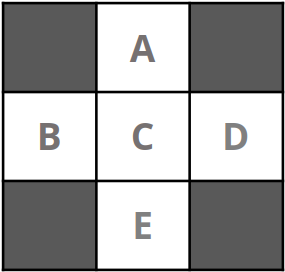

In [10]:
dataset = [
    # episode 1
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 2
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 3
    ['E', 'north','C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 4
    ['E', 'north','C', -1],
    ['C', 'east', 'A', -1],
    ['A', 'exit', 'x', 10],
]

V = {s: 0 for s in states}

alpha = 0.5 # learning rate
gamma = 1   # discount

for s, a, sn, r in dataset:
    # V[s] = (1-alpha) * V[s] + alpha * (r + gamma * V[sn])
    V[s] += alpha * (r + gamma * V[sn] - V[s])

V

{'A': 5.0, 'B': -1.0, 'C': 1.5625, 'D': 8.75, 'E': 1.75, 'x': 0}

- Welke actie gekozen wordt is nu impliciet (passive learning agent).
- In plaats van $V(s)$ kunnen we het alternatief $Q(s, a)$ gebruiken (active learning agent), waarmee we ook acties $a$ kunnen selecteren. 

#### Kwaliteitsfunctie $Q(s, a)$

- $V(s)$ zegt hoe goed het is voor de agent om in state $s$ te zijn
- $Q(s, a)$ zegt hoe goed het is om in state $s$ actie $a$ uit te voeren
- De relatie tussen $V(s)$ en $Q(s, a)$ is:
$$
    V(s) = \max_a Q(s, a)
$$
- Triviaal: vervang $V(s)$ in de update rule om de Q-learning update rule te krijgen:
\begin{align*}
    Q(s, a) &\leftarrow Q(s, a) + \alpha [\gamma \max_{a'} Q(s', a') + R(s, a, s') - Q(s, a)]\\
    Q(s, a) &\leftarrow \underbrace{(1-\alpha)Q(s, a)}_{\text{aandeel oud}} + \underbrace{\alpha (R(s, a, s') + \gamma \max_{a'} Q(s', a'))}_{\text{aandeel nieuw}}
\end{align*} 

In [11]:
dataset = [
    # episode 1
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 2
    ['B', 'east', 'C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 3
    ['E', 'north','C', -1],
    ['C', 'east', 'D', -1],
    ['D', 'exit', 'x', 10],
    # episode 4
    ['E', 'north','C', -1],
    ['C', 'east', 'A', -1],
    ['A', 'exit', 'x', 10],
]

states = ['A', 'B', 'C', 'D', 'E', 'x']
actions = ['east', 'west', 'south', 'north', 'exit']

Q = {s : {a : 0 for a in actions} for s in states}
alpha = 0.5
gamma = 1

for s, a, sn, r in dataset:
    max_Q_sn = max(Q[sn].values())
    Q[s][a] = (1-alpha) * Q[s][a] + alpha * (r + gamma * max_Q_sn)

Q

{'A': {'east': 0, 'west': 0, 'south': 0, 'north': 0, 'exit': 5.0},
 'B': {'east': -0.75, 'west': 0, 'south': 0, 'north': 0, 'exit': 0},
 'C': {'east': 1.5625, 'west': 0, 'south': 0, 'north': 0, 'exit': 0},
 'D': {'east': 0, 'west': 0, 'south': 0, 'north': 0, 'exit': 8.75},
 'E': {'east': 0, 'west': 0, 'south': 0, 'north': 1.75, 'exit': 0},
 'x': {'east': 0, 'west': 0, 'south': 0, 'north': 0, 'exit': 0}}

In [13]:
max(Q['C'].items(), key=lambda x: x[1])

('east', 1.5625)

##### Numpy als dictionary

In [19]:
import numpy as np

stoi = {s:i for i, s in enumerate(states)}  # state to int
atoi = {a:i for i, a in enumerate(actions)} # action to int

num_dataset = [[stoi[s], atoi[a], stoi[sn], r] for s, a, sn, r in dataset]
num_dataset = np.array(num_dataset)

Q_num = np.zeros((len(states), len(actions)))

num_dataset, Q_num

(array([[ 1,  0,  2, -1],
        [ 2,  0,  3, -1],
        [ 3,  4,  5, 10],
        [ 1,  0,  2, -1],
        [ 2,  0,  3, -1],
        [ 3,  4,  5, 10],
        [ 4,  3,  2, -1],
        [ 2,  0,  3, -1],
        [ 3,  4,  5, 10],
        [ 4,  3,  2, -1],
        [ 2,  0,  0, -1],
        [ 0,  4,  5, 10]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

In [21]:
for s, a, sn, r in num_dataset:
    Q_num[s, a] = (1-alpha) * Q_num[s, a] + alpha * (r + gamma * Q_num[sn].max())

Q_num

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  5.    ],
       [-0.75  ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 1.5625,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  8.75  ],
       [ 0.    ,  0.    ,  0.    ,  1.75  ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [25]:
Q_num[stoi['C'], atoi['east']]

1.5625

In [26]:
# kiezen van beste volgende actie
best_idx = Q_num[stoi['C']].argmax()
actions[best_idx]

'east'

## Exploration vs Exploitation

- Hoe komen we aan de dataset van $(s, a, s', r)$ tupels?
- enerzijds at random verkennen van de omgeving (exploration)
- anderzijds beste actie kiezen (exploitation)
- We kunnen $\epsilon$-greedy search gebruiken, waarbij
    - we uniform een random actie kiezen met kans $\epsilon$
    - we de beste actie kiezen met kans $1-\epsilon$
- Belangrijke afweging: welke waarde kies je voor $\epsilon$ (hyperparameter)?